# Random Forest Classifier

In [431]:
import pandas as pd
import numpy as np

In [432]:
data = 'datasets/merged_50k.csv'

df = pd.read_csv(data)

In [433]:
columns = df.columns.to_list()
print(columns)

['id', 'created_utc', 'body', 'sentiment', 'score', 'date', 'sentiment_string', 'open_price', 'high_price', 'low_price', 'close_price', 'adjclose_price', 'volume', 'previous_close', 'price_movement', 'price_movement_tomorrow', 'does_sentiment_match', 'stock_trend_prediction']


In [434]:
columns_to_be_dropped = ['id', 'body', 'created_utc',  
                         'price_movement_tomorrow', 'sentiment_string',
                         'does_sentiment_match', 'price_movement']


In [435]:
df.drop(columns=columns_to_be_dropped, inplace=True)

In [436]:
columns = df.columns.to_list()
print(columns)

['sentiment', 'score', 'date', 'open_price', 'high_price', 'low_price', 'close_price', 'adjclose_price', 'volume', 'previous_close', 'stock_trend_prediction']


In [437]:
summed_df = df.groupby('date').agg({'sentiment': 'sum', 'score': 'sum', 'stock_trend_prediction': 'sum'}).reset_index()

summed_df['stock_trend_prediction'] = summed_df['stock_trend_prediction'].apply(lambda x: 1 if x > 0 else 0)

# Display the new DataFrame
print(summed_df)

           date  sentiment  score  stock_trend_prediction
0    2021-05-01    33.9188    871                       0
1    2021-05-02    38.0589   2136                       0
2    2021-05-03    55.4247   5117                       0
3    2021-05-04    47.8221   3624                       0
4    2021-05-05    81.2476   4818                       0
..          ...        ...    ...                     ...
179  2021-10-27    41.7514   2058                       1
180  2021-10-28    47.3124   1724                       0
181  2021-10-29    97.8517   3169                       1
182  2021-10-30    44.1588    683                       1
183  2021-10-31    30.1968    569                       1

[184 rows x 4 columns]


In [438]:
df.dropna(inplace=True)

In [439]:
df.shape

(47340, 11)

In [440]:
df.head()

,sentiment,score,date,open_price,high_price,low_price,close_price,adjclose_price,volume,previous_close,stock_trend_prediction
0,0.0138,0,2021-05-01,43.75,45.950001,43.174999,43.397499,43.397499,17734400,44.047501,0
1,0.9558,1,2021-05-01,43.75,45.950001,43.174999,43.397499,43.397499,17734400,44.047501,0
2,0.5106,15,2021-05-01,43.75,45.950001,43.174999,43.397499,43.397499,17734400,44.047501,0
3,0.6597,2,2021-05-01,43.75,45.950001,43.174999,43.397499,43.397499,17734400,44.047501,0
4,-0.2918,4,2021-05-01,43.75,45.950001,43.174999,43.397499,43.397499,17734400,44.047501,0


In [441]:
df['weighted_sentiment'] = df['sentiment'] * df['score']

In [442]:
# df['weighted_sentiment'] = df['sentiment'] 

In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47340 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sentiment               47340 non-null  float64
 1   score                   47340 non-null  int64  
 2   date                    47340 non-null  object 
 3   open_price              47340 non-null  float64
 4   high_price              47340 non-null  float64
 5   low_price               47340 non-null  float64
 6   close_price             47340 non-null  float64
 7   adjclose_price          47340 non-null  float64
 8   volume                  47340 non-null  int64  
 9   previous_close          47340 non-null  float64
 10  stock_trend_prediction  47340 non-null  int64  
 11  weighted_sentiment      47340 non-null  float64
dtypes: float64(8), int64(3), object(1)
memory usage: 4.7+ MB


In [444]:
columns

['sentiment',
 'score',
 'date',
 'open_price',
 'high_price',
 'low_price',
 'close_price',
 'adjclose_price',
 'volume',
 'previous_close',
 'stock_trend_prediction']

In [445]:
# df.drop(columns = ['score', 'sentiment'], inplace=True)

In [446]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47340 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sentiment               47340 non-null  float64
 1   score                   47340 non-null  int64  
 2   date                    47340 non-null  object 
 3   open_price              47340 non-null  float64
 4   high_price              47340 non-null  float64
 5   low_price               47340 non-null  float64
 6   close_price             47340 non-null  float64
 7   adjclose_price          47340 non-null  float64
 8   volume                  47340 non-null  int64  
 9   previous_close          47340 non-null  float64
 10  stock_trend_prediction  47340 non-null  int64  
 11  weighted_sentiment      47340 non-null  float64
dtypes: float64(8), int64(3), object(1)
memory usage: 4.7+ MB


In [447]:
# for col in columns:
#     print(df[col].value_counts())

In [448]:
total_weighted_sentiment = df.groupby('date')['weighted_sentiment'].sum().reset_index()

In [449]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47340 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sentiment               47340 non-null  float64
 1   score                   47340 non-null  int64  
 2   date                    47340 non-null  object 
 3   open_price              47340 non-null  float64
 4   high_price              47340 non-null  float64
 5   low_price               47340 non-null  float64
 6   close_price             47340 non-null  float64
 7   adjclose_price          47340 non-null  float64
 8   volume                  47340 non-null  int64  
 9   previous_close          47340 non-null  float64
 10  stock_trend_prediction  47340 non-null  int64  
 11  weighted_sentiment      47340 non-null  float64
dtypes: float64(8), int64(3), object(1)
memory usage: 4.7+ MB


In [450]:
df

,sentiment,score,date,open_price,high_price,low_price,close_price,adjclose_price,volume,previous_close,stock_trend_prediction,weighted_sentiment
0,0.0138,0,2021-05-01,43.750000,45.950001,43.174999,43.397499,43.397499,17734400,44.047501,0,0.0000
1,0.9558,1,2021-05-01,43.750000,45.950001,43.174999,43.397499,43.397499,17734400,44.047501,0,0.9558
2,0.5106,15,2021-05-01,43.750000,45.950001,43.174999,43.397499,43.397499,17734400,44.047501,0,7.6590
3,0.6597,2,2021-05-01,43.750000,45.950001,43.174999,43.397499,43.397499,17734400,44.047501,0,1.3194
4,-0.2918,4,2021-05-01,43.750000,45.950001,43.174999,43.397499,43.397499,17734400,44.047501,0,-1.1672
...,...,...,...,...,...,...,...,...,...,...,...,...
49994,0.5255,4,2021-10-31,45.702499,46.437500,44.500000,45.877499,45.877499,9176000,45.712502,1,2.1020
49996,0.0000,6,2021-10-31,45.702499,46.437500,44.500000,45.877499,45.877499,9176000,45.712502,1,0.0000
49997,-0.5255,3,2021-10-31,45.702499,46.437500,44.500000,45.877499,45.877499,9176000,45.712502,1,-1.5765
49998,0.4576,1,2021-10-31,45.702499,46.437500,44.500000,45.877499,45.877499,9176000,45.712502,1,0.4576


In [451]:
# total_weighted_sentiment = df.groupby('date')['weighted_sentiment'].sum().reset_index()
total_weighted_score = df.groupby('date').agg({'weighted_sentiment': 'sum', 'score': 'sum'}).reset_index()

new_df = pd.DataFrame(total_weighted_sentiment)

In [452]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                184 non-null    object 
 1   weighted_sentiment  184 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [453]:
new_df

,date,weighted_sentiment
0,2021-05-01,351.3956
1,2021-05-02,-332.1862
2,2021-05-03,108.1881
3,2021-05-04,248.7189
4,2021-05-05,204.8666
...,...,...
179,2021-10-27,647.7867
180,2021-10-28,354.9733
181,2021-10-29,1587.1637
182,2021-10-30,187.0281


In [454]:
gme_df = pd.read_csv('datasets/gme_for_forest.csv')

In [455]:
# gme_df

In [456]:
new_df['date'] = pd.to_datetime(new_df['date'])
gme_df['date'] = pd.to_datetime(gme_df['date'])
gme_df = gme_df.sort_values('date')
merged_df = pd.merge_asof(new_df.sort_values('date'), gme_df, left_on='date', right_on='date', direction='backward')

In [457]:
merged_df

,date,weighted_sentiment,open_price,high_price,low_price,close_price,adjclose_price,volume,previous_close,price_movement,price_movement_tomorrow
0,2021-05-01,351.3956,43.750000,45.950001,43.174999,43.397499,43.397499,17734400,44.047501,-1.475684,-1.338334
1,2021-05-02,-332.1862,43.750000,45.950001,43.174999,43.397499,43.397499,17734400,44.047501,-1.475684,-1.338334
2,2021-05-03,108.1881,44.372501,44.372501,39.902500,40.549999,40.549999,21044000,43.397499,-6.561438,-1.475684
3,2021-05-04,248.7189,39.750000,40.372501,37.950001,40.182499,40.182499,16030000,40.549999,-0.906289,-6.561438
4,2021-05-05,204.8666,40.457500,41.375000,39.582500,39.869999,39.869999,11221600,40.182499,-0.777702,-0.906289
...,...,...,...,...,...,...,...,...,...,...,...
179,2021-10-27,647.7867,45.000000,45.772499,43.082500,43.377499,43.377499,4428000,44.459999,-2.434773,2.224519
180,2021-10-28,354.9733,43.790001,45.785000,43.750000,45.712502,45.712502,6784800,43.377499,5.382982,-2.434773
181,2021-10-29,1587.1637,45.702499,46.437500,44.500000,45.877499,45.877499,9176000,45.712502,0.360945,5.382982
182,2021-10-30,187.0281,45.702499,46.437500,44.500000,45.877499,45.877499,9176000,45.712502,0.360945,5.382982


In [458]:
new_df['date'] = pd.to_datetime(new_df['date'])

In [459]:
new_df['date'] = new_df['date'].astype(int) // 10**9  

In [460]:
new_df

,date,weighted_sentiment
0,1619827200,351.3956
1,1619913600,-332.1862
2,1620000000,108.1881
3,1620086400,248.7189
4,1620172800,204.8666
...,...,...
179,1635292800,647.7867
180,1635379200,354.9733
181,1635465600,1587.1637
182,1635552000,187.0281


In [461]:
summed_df['date'] = pd.to_datetime(summed_df['date'])
gme_df['date'] = pd.to_datetime(gme_df['date'])
gme_df = gme_df.sort_values('date')
merged_df = pd.merge_asof(summed_df.sort_values('date'), gme_df, left_on='date', right_on='date', direction='backward')

In [462]:
merged_df

,date,sentiment,score,stock_trend_prediction,open_price,high_price,low_price,close_price,adjclose_price,volume,previous_close,price_movement,price_movement_tomorrow
0,2021-05-01,33.9188,871,0,43.750000,45.950001,43.174999,43.397499,43.397499,17734400,44.047501,-1.475684,-1.338334
1,2021-05-02,38.0589,2136,0,43.750000,45.950001,43.174999,43.397499,43.397499,17734400,44.047501,-1.475684,-1.338334
2,2021-05-03,55.4247,5117,0,44.372501,44.372501,39.902500,40.549999,40.549999,21044000,43.397499,-6.561438,-1.475684
3,2021-05-04,47.8221,3624,0,39.750000,40.372501,37.950001,40.182499,40.182499,16030000,40.549999,-0.906289,-6.561438
4,2021-05-05,81.2476,4818,0,40.457500,41.375000,39.582500,39.869999,39.869999,11221600,40.182499,-0.777702,-0.906289
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2021-10-27,41.7514,2058,1,45.000000,45.772499,43.082500,43.377499,43.377499,4428000,44.459999,-2.434773,2.224519
180,2021-10-28,47.3124,1724,0,43.790001,45.785000,43.750000,45.712502,45.712502,6784800,43.377499,5.382982,-2.434773
181,2021-10-29,97.8517,3169,1,45.702499,46.437500,44.500000,45.877499,45.877499,9176000,45.712502,0.360945,5.382982
182,2021-10-30,44.1588,683,1,45.702499,46.437500,44.500000,45.877499,45.877499,9176000,45.712502,0.360945,5.382982


In [463]:
summed_df['date'] = pd.to_datetime(summed_df['date'])

In [464]:
summed_df['date'] = summed_df['date'].astype(int) // 10**9  

In [465]:
summed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    184 non-null    int64  
 1   sentiment               184 non-null    float64
 2   score                   184 non-null    int64  
 3   stock_trend_prediction  184 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 5.9 KB


In [466]:
# import math

# summed_df['sentiment'] = summed_df['sentiment'] / math.sqrt(summed_df['score'])

# summed_df.drop(columns=['score'], inplace=True)

# print(summed_df)

In [467]:
summed_df

,date,sentiment,score,stock_trend_prediction
0,1619827200,33.9188,871,0
1,1619913600,38.0589,2136,0
2,1620000000,55.4247,5117,0
3,1620086400,47.8221,3624,0
4,1620172800,81.2476,4818,0
...,...,...,...,...
179,1635292800,41.7514,2058,1
180,1635379200,47.3124,1724,0
181,1635465600,97.8517,3169,1
182,1635552000,44.1588,683,1


In [468]:
X = summed_df.drop(['stock_trend_prediction'], axis=1)

y = summed_df['stock_trend_prediction']

In [469]:
# X = new_df.drop(['stock_trend_prediction'], axis=1)

# y = new_df['stock_trend_prediction']

In [470]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [471]:
X_train.head()

,date,sentiment,score
176,1635033600,22.7046,645
115,1629763200,76.8189,4463
78,1626566400,46.8620,3527
36,1622937600,56.1612,2384
128,1630886400,27.7399,922


In [472]:
X_train.shape, X_test.shape

((123, 3), (61, 3))

In [473]:
X_train.dtypes

date           int64
sentiment    float64
score          int64
dtype: object

In [474]:
X_train.head()

,date,sentiment,score
176,1635033600,22.7046,645
115,1629763200,76.8189,4463
78,1626566400,46.8620,3527
36,1622937600,56.1612,2384
128,1630886400,27.7399,922


### Encoding features

In [475]:
# pip install category_encoders

In [476]:
# all data is floating point so cannot encode

In [477]:
# Importing and initializing the classifier
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=42)

In [478]:
# Fit the model
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [479]:
# Get the predictions
y_pred = forest.predict(X_test)

In [480]:
from sklearn.metrics import accuracy_score

In [481]:
# Print model accuracy
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.5574


## 100 Forests

In [483]:
forest_100 = RandomForestClassifier(n_estimators=100, random_state=0)

forest_100.fit(X_train, y_train)

y_pred_100 = forest_100.predict(X_test)

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.5902


## Finding important Features

In [486]:
# load and fit
forest = RandomForestClassifier(n_estimators=100, random_state=0)


forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [487]:
feature_scores = pd.Series(forest.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [489]:
feature_scores

sentiment    0.357452
date         0.327294
score        0.315254
dtype: float64

In [490]:
import matplotlib.pyplot as plt
import seaborn as sns

In [491]:
%matplotlib inline


<Axes: title={'center': 'Visualizing Important Features'}, xlabel='Feature Impactful Score', ylabel='Features'>

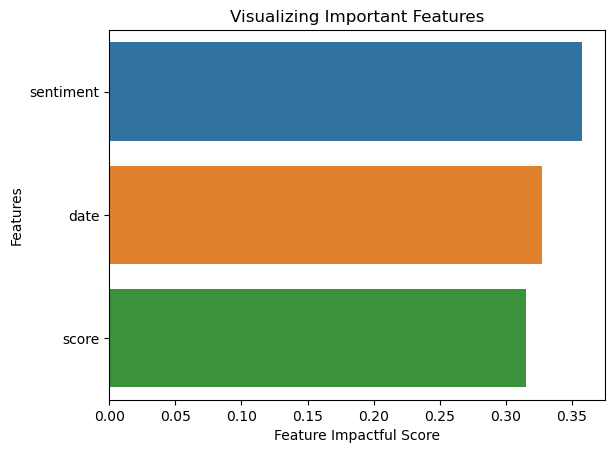

In [494]:
plt.xlabel('Feature Impactful Score')

plt.ylabel('Features')

plt.title("Visualizing Important Features")

sns.barplot(x=feature_scores, y=feature_scores.index)

### Working using the important features

In [498]:
X = summed_df.drop(['stock_trend_prediction', 'score'], axis=1)

y = summed_df['stock_trend_prediction']

In [499]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [501]:
forest = RandomForestClassifier(random_state=69)

forest.fit(X_train, y_train)

RandomForestClassifier(random_state=69)

In [503]:
y_pred = forest.predict(X_test)


In [504]:
print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with doors variable removed : 0.5574


In [505]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[18 17]
 [10 16]]
